# California Housing

Much of data analysis with ML is in the data preparation step: building monitoring tools, setting up human evaluation pipelines, and automating regular model training. The machine learning algorithms are important, of course, but it is probably preferable to be comfortable with the overall process and know three or four algorithms well rather than to spend all your time exploring advanced algorithms.

Let's analyze how housing prices across California varies according to a number of factors.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Getting Data

In [2]:
HOUSING_FILE = "../data/ca_housing.csv"
if not Path(HOUSING_FILE).exists():
    print(f"ERROR: {HOUSING_FILE} does not exist")
else:
    raw = pd.read_csv(HOUSING_FILE)
    
raw.shape

(20640, 10)

## Checking out Data

In [3]:
raw.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
raw.value_counts("ocean_proximity")

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

## Data Visualization

In [7]:
import matplotlib.pyplot as plt

def saveImage(filename, format="png", dpi=300):
    plt.savefig(f"ca_housing_histograms.{format}", format=format, dpi=dpi)
    
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 

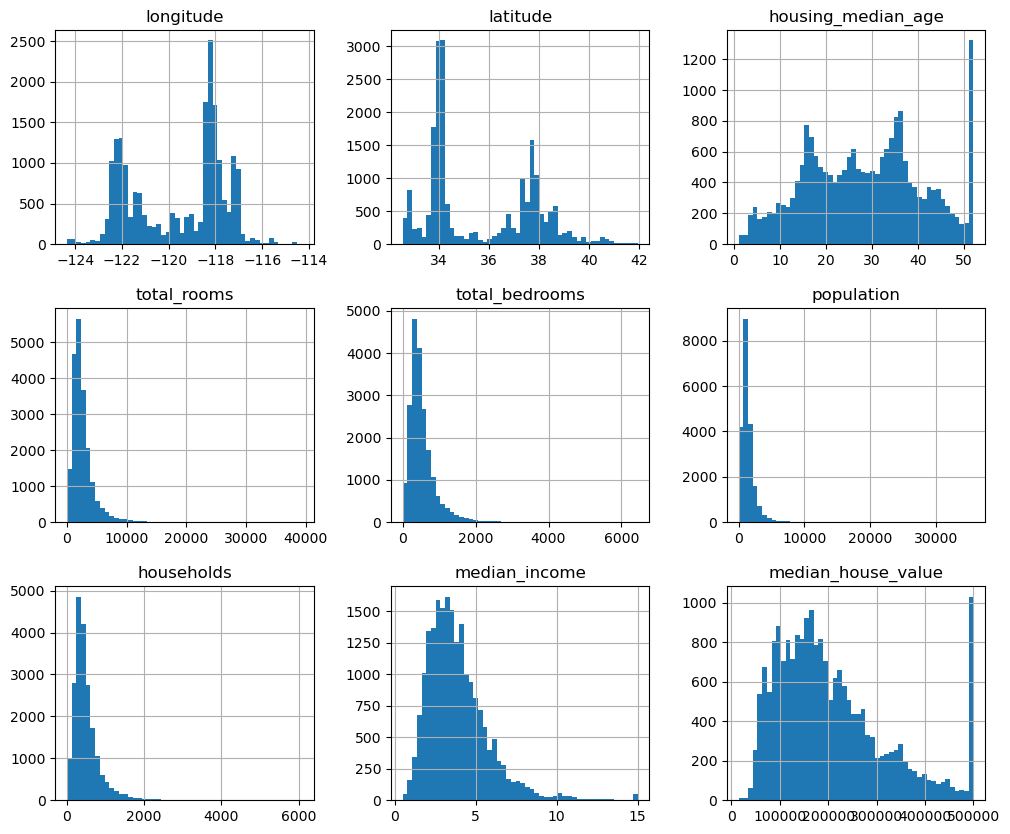

In [8]:
housing = raw.copy()

housing.hist(bins=50, figsize=(12, 10))

# saving the image to a file
saveImage(f"ca_housing_histograms")
plt.show()

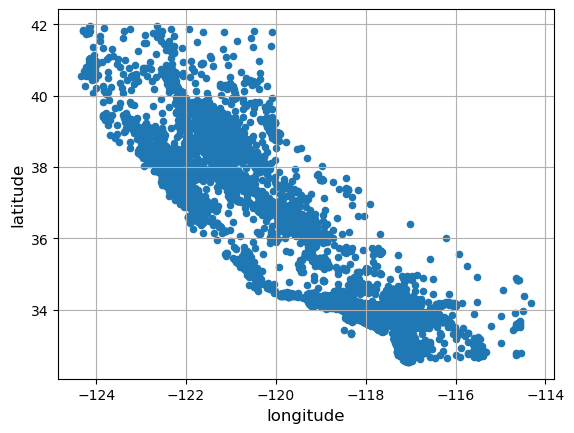

In [9]:
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             grid=True)
saveImage(f"ca_housing_map1")
plt.show()

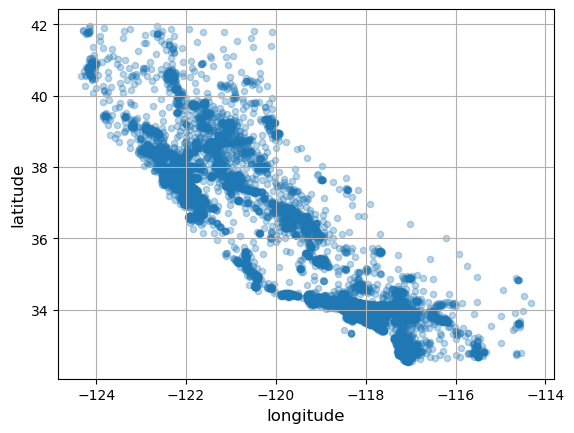

In [10]:
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             grid=True, 
             alpha=0.3)
saveImage(f"ca_housing_map2")
plt.show()

`matplotlib` ColorMap: [link](https://matplotlib.org/stable/tutorials/colors/colormaps.html) main choices:
- rainbow
- jet
- turbo

DataFrame parameters:
- "kind" : type of graph
- "s" : size of bubble
- "c" : color variable

In [11]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

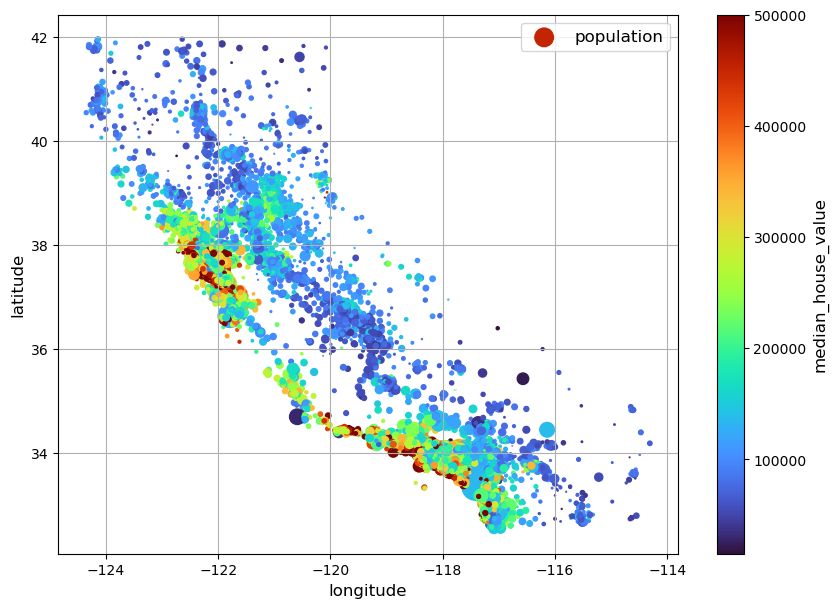

In [12]:
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             grid=True,
             s=housing["population"] / 100, 
             label="population",
             c="median_house_value", 
             cmap="turbo", 
             colorbar=True,
             legend=True, 
             figsize=(10, 7))
saveImage("ca_housing_map3")  # extra code
plt.show()

## Stratified Sampling

Stratified random sampling is a technique used to ensure that the training and test datasets represent the overall population. This technique is especially important when you're dealing with an imbalanced dataset, or when the dataset's categorical variables have different levels with varying frequencies.

In a stratified random sample, each subgroup within the overall population is adequately represented within the whole sample. Each subgroup is called a stratum, and stratified random sampling represents these strata well.

Let's say you've talked with some professionals and they've explained that the middle (or median) income level is really important for predicting the average price of houses. You would want to make sure that your test data represents the different ranges of income in all your information.

Since the median income is just a plain number and could be anything, we first need to create income categories. Imagine we look at our data's median incomes. You'll notice that most of the median income levels are bunched up between $15,000 to $60,000. But, some median incomes are much higher than that.

To get a good estimate of the importance of each income level (or stratum), we need to have enough data for each level. This means we shouldn't have too many different income categories, and each category should include a good amount of data.

So, how can we do this? Well, we can use something called the pd.cut() function to make an income category with five groups (numbered from 1 to 5). The first group ranges from 0 to 1.5 (or less than $15,000), the second group from 1.5 to 3, and so on. This way, we can ensure each group has enough data and isn't too specific.

In [13]:
pd.options.mode.chained_assignment = None  # default='warn'
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [14]:
housing['income_cat'].value_counts().sort_index()

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64

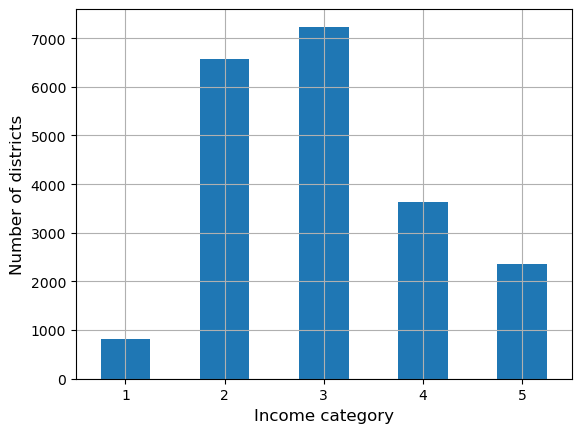

In [15]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()


Scikit-learn provides several functions to split datasets, such as train_test_split(). 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [18]:
strat_train_set, strat_test_set = train_test_split(
    housing, 
    test_size=0.2, 
    stratify=housing["income_cat"], 
    random_state=1)

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [20]:
# random train_test split
rand_train_set, rand_test_set = train_test_split(
    housing, 
    test_size=0.2, 
    random_state=1
)

In [21]:
# comparing error differences for random vs stratified sampling

def cat_proportions(df, cat):
    return df[cat].value_counts() / len(df)

compare_df = pd.DataFrame({
    "Target %": cat_proportions(housing, "income_cat"),
    "Random %": cat_proportions(rand_test_set, "income_cat"),
    "Stratified %": cat_proportions(strat_test_set, "income_cat"),
}).sort_index()
compare_df.index.name = "Income Category"
(compare_df*100).round(2)


,Target %,Random %,Stratified %
Income Category,,,
1,3.98,4.24,4.00
2,31.88,31.08,31.88
3,35.06,35.42,35.05
4,17.63,17.47,17.64
5,11.44,11.80,11.43


In [22]:
# after creating the stratified samples, we can remove the "income_cat"

for s in (strat_train_set, strat_test_set):
    s.drop("income_cat", axis=1, inplace=True)

In [27]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

## Data Prep for ML

### Dealing with Nulls

When we have null values, we can deal with them using one of 3 popular methods:

- Drop rows with nulls
- Drop columns with nulls
- Assign default values to cells with nulls: imputation

In [23]:
X = strat_train_set.copy()
X.isnull().sum(), X.shape

(longitude               0
 latitude                0
 housing_median_age      0
 total_rooms             0
 total_bedrooms        160
 population              0
 households              0
 median_income           0
 median_house_value      0
 ocean_proximity         0
 dtype: int64,
 (16512, 10))

In [29]:
X_num = X.select_dtypes(include=[np.number])
X_num.shape

(16512, 9)

In [35]:
from sklearn.impute import SimpleImputer, KNNImputer
# imputer = SimpleImputer(strategy="median")
imputer = KNNImputer(n_neighbors=2)

imputer.fit(X_num)


KNNImputer(n_neighbors=2)

In [36]:
imputed = imputer.transform(X_num)
imputed.shape

(16512, 9)

In [37]:
X_tr = pd.DataFrame(imputed, 
                    columns=X_num.columns,
                    index=X_num.index)

### Creating Input & Target datasets

In [43]:
y = X_tr["median_house_value"].copy()
X = X_tr.drop("median_house_value", axis=1)
X.shape, y.shape

((16512, 8), (16512,))

### Removing Outliers

To have a robust estimator, let's remove outliers from training data set

[Isolation Forest](https://en.wikipedia.org/wiki/Isolation_forest) is an algorithm for data anomaly detection initially developed by Fei Tony Liu and Zhi-Hua Zhou in 2008. Isolation Forest detects anomalies using binary trees. The algorithm has a linear time complexity and a low memory requirement, which works well with high-volume data. In essence, the algorithm performs a fast approximate density estimation, and considers points with a low density estimate as anomalies.

In [41]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=1)
outlier_pred = isolation_forest.fit_predict(X.select_dtypes(include=[np.number]))
outlier_pred[:10]

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1])

In [42]:
X = X.iloc[outlier_pred == 1]
y = y.iloc[outlier_pred == 1]

X.shape, y.shape

((14469, 8), (14469,))

### One-hot Encoding for Categorical Variables

In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [48]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
housing_cat_encoded = onehot.fit_transform(housing_cat)
housing_cat_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [49]:
housing_cat_encoded.shape

(20640, 5)

In [50]:
onehot.handle_unknown = "ignore"
onehot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
onehot.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [52]:
onehot.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling

In [53]:
X_num = X.select_dtypes(include=[np.number])
X.shape, X_num.shape

((16512, 8), (16512, 8))

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.567714,35.632579,28.633963,2641.638566,539.019652,1431.055172,501.166061,3.868548
std,2.007457,2.137868,12.542783,2199.714529,426.192794,1151.248480,386.989202,1.895953
min,-124.350000,32.540000,1.000000,6.000000,1.000000,5.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1449.750000,297.000000,788.000000,280.000000,2.562500
50%,-118.490000,34.255000,29.000000,2127.000000,433.000000,1165.000000,408.000000,3.532750
75%,-118.000000,37.710000,37.000000,3147.250000,647.000000,1727.250000,606.000000,4.747275
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [55]:
X_num_scaled_array = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled_array,
                            columns=X_num.columns,
                            index=X_num.index)
X_num_scaled.shape

(16512, 8)

In [56]:
X_num_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,7.636441e-15,-8.188971e-16,-1.222106e-16,2.044015e-17,-1.032766e-17,-1.194135e-17,-8.821540e-18,5.637179e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.382332e+00,-1.446616e+00,-2.203243e+00,-1.198209e+00,-1.262424e+00,-1.238741e+00,-1.292494e+00,-1.776811e+00
25%,-1.112030e+00,-7.964154e-01,-8.478410e-01,-5.418542e-01,-5.678814e-01,-5.585889e-01,-5.715218e-01,-6.888819e-01
50%,5.368717e-01,-6.443902e-01,2.918395e-02,-2.339641e-01,-2.487674e-01,-2.311084e-01,-2.407532e-01,-1.771185e-01
75%,7.809690e-01,9.717549e-01,6.670202e-01,2.298602e-01,2.533680e-01,2.572892e-01,2.709045e-01,4.634890e-01
max,2.619171e+00,2.955099e+00,1.862963e+00,1.667465e+01,1.385795e+01,2.975203e+01,1.442160e+01,5.871395e+00


### Heavy Tail attribues

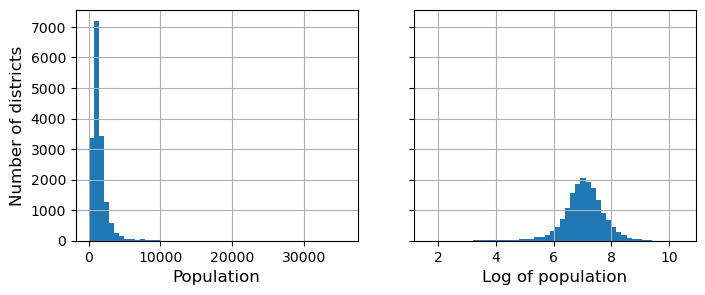

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
X["population"].hist(ax=axs[0], bins=50)
X["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
saveImage("ca_housing_long_tail_plot")
plt.show()

In [57]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(X[["population"]])
log_pop[:10]

,population
19582,6.478510
18188,7.277248
14857,7.745436
3187,7.094235
3465,7.342779
10320,7.093405
13079,6.651572
2706,6.624065
6507,7.901007
8257,6.806829


### Clustering Geo with K-Means

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=6, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X) # , sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
cluster_similarity = ClusterSimilarity(n_clusters=10, gamma=1., random_state=1)

In [60]:
X[["latitude", "longitude"]].isnull().sum()

latitude     0
longitude    0
dtype: int64

In [61]:
similarities = cluster_similarity.fit_transform(X[["latitude", "longitude"]])
similarities[:5].round(2)

array([[0.  , 0.95, 0.  , 0.  , 0.23, 0.12, 0.  , 0.  , 0.  , 0.71],
       [0.67, 0.  , 0.28, 0.  , 0.  , 0.  , 0.92, 0.  , 0.  , 0.  ],
       [0.  , 0.9 , 0.  , 0.  , 0.06, 0.09, 0.  , 0.  , 0.  , 0.31],
       [0.  , 0.99, 0.  , 0.  , 0.18, 0.13, 0.  , 0.  , 0.  , 0.59],
       [0.  , 1.  , 0.  , 0.  , 0.14, 0.13, 0.  , 0.  , 0.  , 0.5 ]])

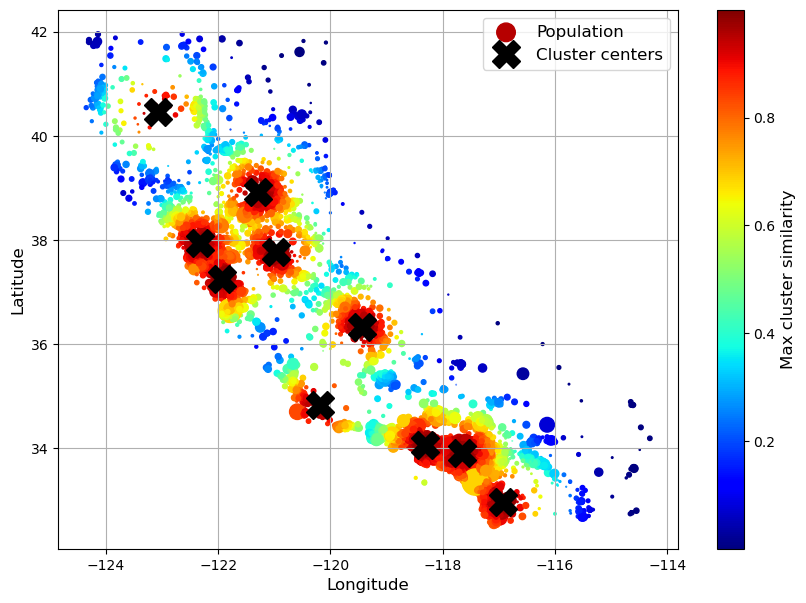

In [62]:
X_renamed = X.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
X_renamed["Max cluster similarity"] = similarities.max(axis=1)

X_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=X_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_similarity.kmeans_.cluster_centers_[:, 1],
         cluster_similarity.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
saveImage("ca_housing_cluster_plot")
plt.show()

## Transformation Pipelines

In [63]:
import sklearn 
sklearn.set_config(display="diagram")

In [64]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

In [65]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler())

In [66]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [68]:
array_processed = preprocessing.fit_transform(X)
array_processed.shape

(16512, 8)

In [69]:
X_prepped = pd.DataFrame(array_processed, 
                          columns=preprocessing.get_feature_names_out(),
                          index=X.index
                          )
X_prepped.shape

(16512, 8)

In [70]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19582,-122.17,37.78,42.0,1524.0,260.0,651.0,267.0,3.6875
18188,-117.81,33.67,9.0,3279.0,530.0,1447.0,510.0,7.4581
14857,-122.61,38.09,18.0,6205.0,821.0,2311.0,756.0,6.9081
3187,-122.26,37.89,52.0,3706.0,531.0,1205.0,504.0,6.6828
3465,-122.35,37.97,43.0,2178.0,482.0,1545.0,471.0,2.5863


In [71]:
X_prepped.head(5)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income
19582,-1.296349,1.004499,1.065668,-0.508099,-0.654699,-0.677594,-0.605115,-0.095495
18188,0.875619,-0.918036,-1.565407,0.289756,-0.021164,0.013850,0.022828,1.893328
14857,-1.515538,1.149508,-0.847841,1.619969,0.661646,0.764363,0.658524,1.603227
3187,-1.341183,1.055954,1.862963,0.483878,-0.018818,-0.196362,0.007323,1.484392
3465,-1.386017,1.093375,1.145397,-0.210779,-0.133792,0.098978,-0.077953,-0.676328


#### Adding useful ratios to aid recognition

In [72]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] 
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=1)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline
    ) 

In [73]:
array_processed = preprocessing.fit_transform(X)
array_processed.shape
X_prepped = pd.DataFrame(array_processed, 
                          columns=preprocessing.get_feature_names_out(),
                          index=X.index
                          )
X_prepped.shape

(16512, 19)

In [74]:
X_prepped.head(5)

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,geo__Cluster 2 similarity,geo__Cluster 3 similarity,geo__Cluster 4 similarity,geo__Cluster 5 similarity,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,remainder__housing_median_age
19582,-0.737596,0.110486,-0.057155,-0.674354,-0.403780,-0.745306,-0.540939,0.129345,3.380074e-13,9.496941e-01,9.173580e-23,0.000072,2.349325e-01,1.237142e-01,4.660233e-16,3.053012e-06,3.289963e-04,7.094710e-01,1.065668
18188,-0.894065,0.395141,-0.022732,0.301587,0.621159,0.339413,0.343206,1.628083,6.669513e-01,1.605610e-17,2.756529e-01,0.000059,2.402414e-12,5.875374e-18,9.200497e-01,9.557413e-04,8.611729e-33,1.189384e-13,-1.565407
14857,-1.405602,1.096678,-0.003788,0.901305,1.474362,0.975231,0.880979,1.465079,8.459961e-16,9.031328e-01,3.418844e-26,0.000002,6.051574e-02,8.637263e-02,5.987554e-19,6.348721e-08,2.870287e-03,3.087110e-01,-0.847841
3187,-1.214251,0.759573,-0.061237,0.304170,0.784912,0.090874,0.327037,1.394525,7.297944e-14,9.926507e-01,1.211565e-23,0.000031,1.848899e-01,1.329635e-01,8.661363e-17,1.091342e-06,6.843113e-04,5.920318e-01,1.862963
3465,0.146896,-0.317027,0.015481,0.171497,0.073867,0.428407,0.234522,-0.625439,1.915188e-14,9.988054e-01,2.076861e-24,0.000015,1.415798e-01,1.297327e-01,1.973668e-17,4.529486e-07,1.177972e-03,4.959993e-01,1.145397


## Training

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7fa...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=10,
                                                                    random_state=1),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faa08fe0d30>)])),
                ('linearregression', LinearRegression())])

In [77]:
X_predictions = lin_reg.predict(X)
lin_rmse = mean_squared_error(y, X_predictions, squared=False)
X_predictions[:5].round(-2), y.iloc[:5].round(-2).values, lin_rmse

(array([275700., 288400., 315800., 371300., 168900.]),
 array([157300., 296600., 368700., 370900., 112200.]),
 68185.21197366485)

In [78]:
y.describe()

count     16512.000000
mean     206465.180959
std      115008.479333
min       14999.000000
25%      119775.000000
50%      179550.000000
75%      264000.000000
max      500001.000000
Name: median_house_value, dtype: float64

### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=1)) 
tree_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7fa...
                                                  ClusterSimilarity(n_clusters=10,
                                                                    random_state=1),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faa08fe0d30>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=1))])

In [80]:
X_predictions = tree_reg.predict(X)
tree_rmse = mean_squared_error(y, X_predictions, squared=False)
tree_rmse

0.0

Zero training error! Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly overfit the data. How can you be sure? As you saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for model validation.

### Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, 
                              X, y,
                              scoring="neg_root_mean_squared_error", 
                              cv=10)
pd.Series(tree_rmses).describe()

count       10.000000
mean     66876.457945
std       1975.823036
min      63178.150950
25%      65834.741924
50%      67094.881965
75%      67727.791201
max      70392.728916
dtype: float64

### Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=1))
forest_rmses = -cross_val_score(forest_reg, 
                                X, y,
                                scoring="neg_root_mean_squared_error", 
                                cv=10)

In [91]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47433.716569
std       1804.206926
min      44547.403550
25%      46899.333839
50%      47534.738020
75%      48614.468930
max      49682.318835
dtype: float64

In [92]:
# Let's see WITHOUT cross-validation, what is the error on the training set

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=1)) 
forest_reg.fit(X, y)
X_predictions = forest_reg.predict(X)

forest_rmse = mean_squared_error(y, X_predictions, squared=False)
forest_rmse

17792.6776688313

## Fine Tuning Models

### Grid Serach

In [84]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=1)),
], memory="pipeline_memory")

In [85]:
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},

]
grid_search = GridSearchCV(full_pipeline, 
                           param_grid, 
                           cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(memory='pipeline_memory',
                                steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransfo...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7faa08fe0d30>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=1))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [87]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [88]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,5.021940,0.174635,0.122290,0.001584,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-44719.295241,-44106.600787,-45087.093919,-44637.663316,404.425126,1
13,5.586964,0.080381,0.123019,0.006380,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-45155.001396,-44510.586388,-45310.132038,-44991.906607,346.187082,2
14,7.026243,0.387324,0.118107,0.003404,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-45605.423443,-45122.213239,-45940.888741,-45556.175141,336.032182,3
6,3.749711,0.018710,0.126431,0.002076,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-46266.790418,-45080.252973,-46267.580421,-45871.541271,559.525414,4
7,4.761075,0.126996,0.122993,0.004433,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-46525.781807,-45603.492091,-46612.120249,-46247.131382,456.484563,5


In [89]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,44719,44107,45087,44638
13,15,8,45155,44511,45310,44992
14,15,10,45605,45122,45941,45556
6,10,4,46267,45080,46268,45872
7,10,6,46526,45603,46612,46247


## Evaluating using Test set

In [93]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
final_predictions = forest_reg.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

47301.69703468031


You might want to have an idea of how precise this estimate is. For this, you can compute a 95% conidence interval for the generalization error using scipy.stats.t.interval()

In [94]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45136.21945672, 49372.28754956])